In [80]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [81]:
# Load data
data = pd.read_csv('Data/cloneData.csv')

# Define target and features
y = data['waste']
X = data[['population', 'gdp', 'householdMinIncome', 'death']]

In [83]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [85]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [86]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 19265759448.63837
R^2 Score: 0.9926864282550659


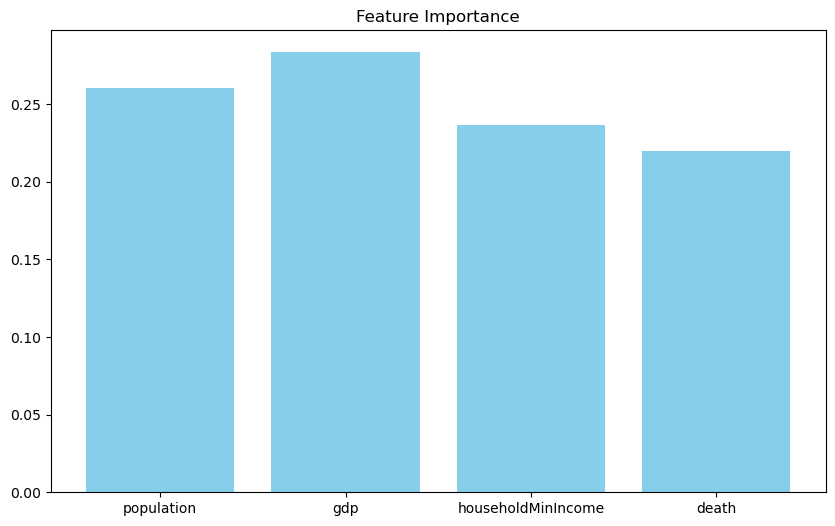

In [87]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='skyblue')
plt.title('Feature Importance')
plt.show()

In [88]:
# Function to forecast using ARIMA
def forecast_arima(series, forecast_periods):
    model = ARIMA(series, order=(1, 1, 1))  # Adjust ARIMA order based on your data
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_periods)
    return forecast

In [89]:
# Forecasting each feature
future_years = [2025, 2026, 2027]  # Extend as needed
forecast_periods = len(future_years)

In [90]:
# Forecast GDP
gdp_forecast = forecast_arima(data['gdp'], forecast_periods)
print(f"Forecasted GDP for {future_years}: {gdp_forecast}")

Forecasted GDP for [2025, 2026, 2027]: 25    1.652877e+06
26    1.694855e+06
27    1.736799e+06
Name: predicted_mean, dtype: float64


In [91]:
# Forecast Population
population_forecast = forecast_arima(data['population'], forecast_periods)
print(f"Forecasted Population for {future_years}: {population_forecast}")

Forecasted Population for [2025, 2026, 2027]: 25    3.438735e+07
26    3.470864e+07
27    3.502283e+07
Name: predicted_mean, dtype: float64


In [92]:
# Forecast Household Minimum Income
household_min_income_forecast = forecast_arima(data['householdMinIncome'], forecast_periods)
print(f"Forecasted Household Minimum Income for {future_years}: {household_min_income_forecast}")

Forecasted Household Minimum Income for [2025, 2026, 2027]: 25    8833.792116
26    8989.584226
27    9145.376330
Name: predicted_mean, dtype: float64


In [93]:
# Forecast Death
death_forecast = forecast_arima(data['death'], forecast_periods)
print(f"Forecasted Death for {future_years}: {death_forecast}")

Forecasted Death for [2025, 2026, 2027]: 25    201135.003889
26    201180.888852
27    201172.330059
Name: predicted_mean, dtype: float64


In [94]:
# Combine future data into a DataFrame
future_data = pd.DataFrame({
    'population': population_forecast,
    'gdp': gdp_forecast,
    'householdMinIncome': household_min_income_forecast,
    'death': death_forecast
})

In [96]:
print("Future Data for Prediction:")
print(future_data)

Future Data for Prediction:
      population           gdp  householdMinIncome          death
25  3.438735e+07  1.652877e+06         8833.792116  201135.003889
26  3.470864e+07  1.694855e+06         8989.584226  201180.888852
27  3.502283e+07  1.736799e+06         9145.376330  201172.330059


In [102]:
# Predict waste generation for each future year
predicted_waste = rf_model.predict(future_data)
for year, waste in zip(future_years, predicted_waste):
    print(f"Predicted Waste Generated for {year}: {waste}")

Predicted Waste Generated for 2025: 18806009.34
Predicted Waste Generated for 2026: 18806009.34
Predicted Waste Generated for 2027: 18806009.34
